<a href="https://colab.research.google.com/github/Muhammad-Danish-Abbas/Agentic_AI/blob/main/Project_4_Fine_tuning_With_SDK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fine tuning

##Install the client library

In [1]:
!pip install -q google-generativeai

In [2]:
import google.generativeai as genai

In [3]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [4]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-7483
tunedModels/generate-num-9464
tunedModels/generate-num-4638
tunedModels/square-gen-206
tunedModels/square-gen-9523


##Create tuned model

In [5]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [6]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '4',
        },{
             'text_input': '-3',
             'output': '-2',
        },{
             'text_input': 'twenty two',
             'output': 'twenty three',
        },{
             'text_input': 'two hundred',
             'output': 'two hundred one',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred',
        },{
             'text_input': '8',
             'output': '9',
        },{
             'text_input': '-98',
             'output': '-97',
        },{
             'text_input': '1,000',
             'output': '1,001',
        },{
             'text_input': '10,100,000',
             'output': '10,100,001',
        },{
             'text_input': 'thirteen',
             'output': 'fourteen',
        },{
             'text_input': 'eighty',
             'output': 'eighty one',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'four',
        },{
             'text_input': 'seven',
             'output': 'eight',
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [7]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-3741',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 2, 2, 4, 25, 13, 11548, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 2, 2, 4, 25, 13, 11548, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 2, 2, 4, 25, 13, 857010, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  lear

##Check tuning progress
Use metadata to check the state:

In [8]:
operation.metadata

tuned_model: "tunedModels/generate-num-3741"
total_steps: 375

In [9]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/375 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

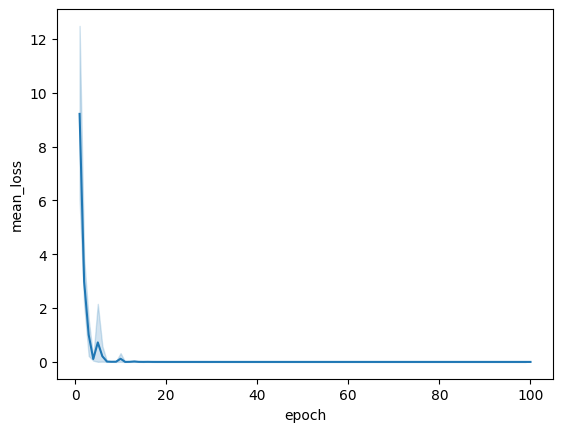

In [10]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


##Evaluate your model

In [11]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [12]:
result = model.generate_content('55')
result.text

'56'

In [13]:
result = model.generate_content('123455')
result.text

'123456'

In [14]:
result = model.generate_content('four')
result.text

'five'

In [15]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

In [16]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'आठ'

##Update the description

In [17]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my Fine tuning model."});

In [18]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my Fine tuning model.'

##Delete the model

In [19]:
genai.delete_tuned_model(f'tunedModels/{name}')

In [20]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/generate-num-3741?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/generate-num-3741 does not exist.


tunedModels/generate-num-7483
tunedModels/generate-num-9464
tunedModels/generate-num-4638
tunedModels/square-gen-206
tunedModels/square-gen-9523
Base Model: models/gemini-1.5-flash-001-tuning


  0%|          | 0/325 [00:00<?, ?it/s]

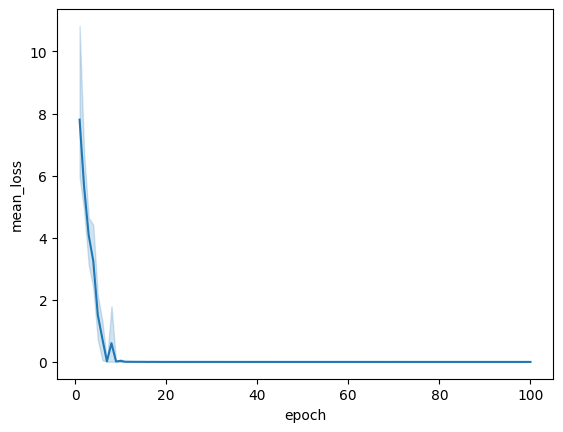

In [67]:
# ✅ Install required libraries
!pip install -q google-generativeai

# ✅ Import necessary modules
import google.generativeai as genai
from google.colab import userdata
import random
import time
import pandas as pd
import seaborn as sns

# ✅ Configure API key (Make sure to add API key in Colab's secrets)
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

# ✅ List available tuned models
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

# ✅ Select the base Gemini Flash model
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name
][0]
print("Base Model:", base_model.name)

# ✅ Define the fine-tuning dataset (Squares of numbers)
training_data = [
    {'text_input': '1', 'output': '1'},
    {'text_input': '2', 'output': '4'},
    {'text_input': '3', 'output': '9'},
    {'text_input': '4', 'output': '16'},
    {'text_input': '5', 'output': '25'},
    {'text_input': '-3', 'output': '9'},
    {'text_input': '-5', 'output': '25'},
    {'text_input': '10', 'output': '100'},
    {'text_input': '15', 'output': '225'},
    {'text_input': '20', 'output': '400'},
    {'text_input': '50', 'output': '2500'},
    {'text_input': '100', 'output': '10000'},
    {'text_input': '1000', 'output': '1000000'}
]

# ✅ Generate a unique model name
name = f'square-gen-{random.randint(0,10000)}'

# ✅ Start fine-tuning the model
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=training_data,
    id=name,
    epoch_count=100,  # Number of training iterations
    batch_size=4,  # Training batch size
    learning_rate=0.001,  # Learning rate
)

# ✅ Wait for the fine-tuning process to complete
for status in operation.wait_bar():
    time.sleep(30)

# ✅ Retrieve the fine-tuned model
model = operation.result()

# ✅ Monitor training loss over epochs
snapshots = pd.DataFrame(model.tuning_task.snapshots)
sns.lineplot(data=snapshots, x='epoch', y='mean_loss')

# ✅ Load the fine-tuned model
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [71]:
# ✅ Test the fine-tuned model
test_values = ['25']
for value in test_values:
    result = model.generate_content(value)

    # Check if there are candidates and extract the correct output
    if result.candidates and hasattr(result.candidates[0], "content"):
        output = result.candidates[0].content  # Extract model output
        print(f"Input: {value} → Output: {output}")
    else:
        print(f"Input: {value} → No output generated")


Input: 25 → No output generated
